In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
data=pd.read_csv("steps_tracker_dataset.csv")
data.head(5)

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
0,08/10/2022,4147,3.11,124.41,41,10.5,3.77,stressed
1,11/06/2022,323,0.24,9.69,3,6.0,1.90,sad
2,28/01/2022,6622,4.97,198.66,66,6.0,4.48,sad
3,23/03/2022,11136,8.35,334.08,111,8.0,1.08,tired
4,20/05/2022,2718,2.04,81.54,27,4.9,1.00,tired


In [29]:
data.columns

Index(['date', 'steps', 'distance_km', 'calories_burned', 'active_minutes',
       'sleep_hours', 'water_intake_liters', 'mood'],
      dtype='object')

In [30]:
data.info()
data=data.drop(["date"],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 500 non-null    object 
 1   steps                500 non-null    int64  
 2   distance_km          500 non-null    float64
 3   calories_burned      500 non-null    float64
 4   active_minutes       500 non-null    int64  
 5   sleep_hours          500 non-null    float64
 6   water_intake_liters  500 non-null    float64
 7   mood                 500 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


In [31]:
le=LabelEncoder()
data["mood"]=le.fit_transform(data["mood"])

In [32]:
x=data.drop(["mood"],axis=1)
y=data["mood"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes Classifier": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

In [34]:
param_grid = {
    "Random Forest Classifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    "Decision Tree Classifier": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    },
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs", "saga"]
    },
    "Naive Bayes Classifier": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "Gradient Boosting Classifier": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "max_depth": [3, 5, 10],
        "subsample": [0.7, 0.8, 0.9, 1.0]
    }
}

In [35]:
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    param_search = RandomizedSearchCV(
        model, param_grid[model_name], 
        n_iter=20, scoring='accuracy', 
        cv=5, random_state=42, n_jobs=-1
    )
    param_search.fit(x_train, y_train)
    best_models[model_name] = param_search.best_estimator_
    print(f"Best parameters for {model_name}: {param_search.best_params_}\n")


Tuning Random Forest Classifier...
Best parameters for Random Forest Classifier: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': False}

Tuning Decision Tree Classifier...
Best parameters for Decision Tree Classifier: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}

Tuning K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}

Tuning Logistic Regression...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}

Tuning Naive Bayes Classifier...
Best parameters for Naive Bayes Classifier: {'var_smoothing': 1e-08}

Tuning Gradient Boosting Classifier...
Best parameters for Gradient Boosting Classifier: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01}



In [36]:
for model_name, model in best_models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 0.2100
              precision    recall  f1-score   support

           0       0.26      0.33      0.29        18
           1       0.25      0.22      0.23        23
           2       0.38      0.26      0.31        19
           3       0.20      0.18      0.19        22
           4       0.04      0.06      0.05        18

    accuracy                           0.21       100
   macro avg       0.23      0.21      0.22       100
weighted avg       0.23      0.21      0.22       100

Decision Tree Classifier Accuracy: 0.3000
              precision    recall  f1-score   support

           0       0.20      0.22      0.21        18
           1       0.45      0.43      0.44        23
           2       0.38      0.42      0.40        19
           3       0.29      0.27      0.28        22
           4       0.12      0.11      0.12        18

    accuracy                           0.30       100
   macro avg       0.29      0.29      0.29    

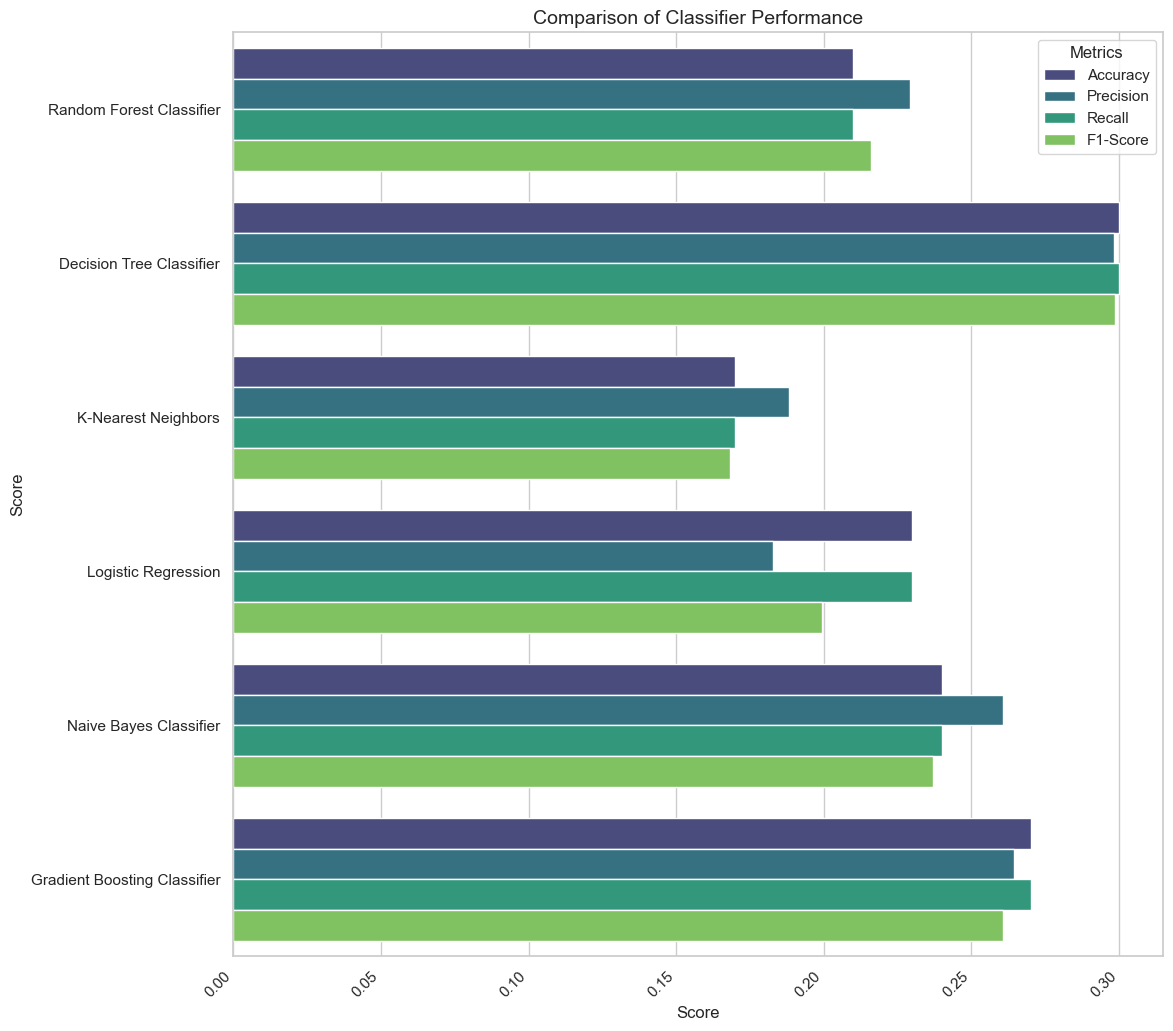

In [37]:
results = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for model_name, model in best_models.items():
    y_pred = model.predict(x_test)

    results["Classifier"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
    results["F1-Score"].append(f1_score(y_test, y_pred, average='weighted'))

df_results = pd.DataFrame(results)
df_melted = df_results.melt(id_vars="Classifier", var_name="Metric", value_name="Score")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12))
sns.barplot(y="Classifier", x="Score", hue="Metric", data=df_melted, palette="viridis")

plt.title("Comparison of Classifier Performance", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.legend(title="Metrics")

plt.show()